# EXPLORATORY DATA ANALYSIS

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## 2. Read data

In [2]:
books = pd.read_csv('books.csv')
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


## 3. Data Exploration

### a. Data shape

In [3]:
print(f"Number of rows: {books.shape[0]}")
print(f"Number of columns: {books.shape[1]}")

Number of rows: 6810
Number of columns: 12


In [4]:
print(f"Column names: {books.columns.tolist()}")

Column names: ['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories', 'thumbnail', 'description', 'published_year', 'average_rating', 'num_pages', 'ratings_count']


### b. Columns description

| Column          | Description                                                                 |
|-----------------|-----------------------------------------------------------------------------|
| isbn13          | The 13-digit International Standard Book Number (unique identifier).        |
| isbn10          | The 10-digit International Standard Book Number (unique identifier).        |
| title           | Title of the book.                                                          |
| subtitle        | Subtitle of the book (if available, often indicates edition/series/format). |
| authors         | Authors of the book, separated by `;` if multiple.                          |
| categories      | Book categories/genres, separated by `;`.                                   |
| thumbnail       | URL link to the book’s thumbnail image (cover page).                        |
| description     | Text description or blurb about the book.                                   |
| published_year  | Year when the book was published.                                           |
| average_rating  | Average rating score of the book (from user reviews).                       |


### c. Missing values

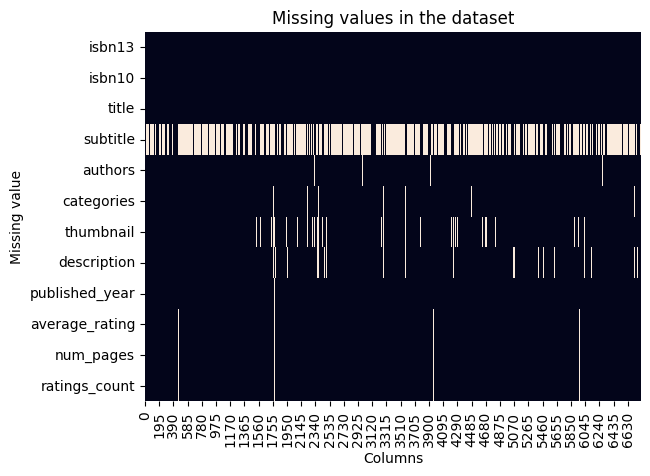

In [5]:
ax = plt.axes()
sns.heatmap(books.isnull().transpose(), cbar=False, ax=ax)
plt.xlabel("Columns")
plt.ylabel("Missing value")
plt.title("Missing values in the dataset")
plt.show()

### d. Check format of each columns

In [6]:
print(books.dtypes)

isbn13              int64
isbn10             object
title              object
subtitle           object
authors            object
categories         object
thumbnail          object
description        object
published_year    float64
average_rating    float64
num_pages         float64
ratings_count     float64
dtype: object


### e. Correlation matrix `"num_pages", "age_of_book", "missing_description", "average_rating"`

In [7]:
books["missing_description"] = np.where(books["description"].isnull(), 1, 0)
books["age_of_book"] = 2025 - books["published_year"]

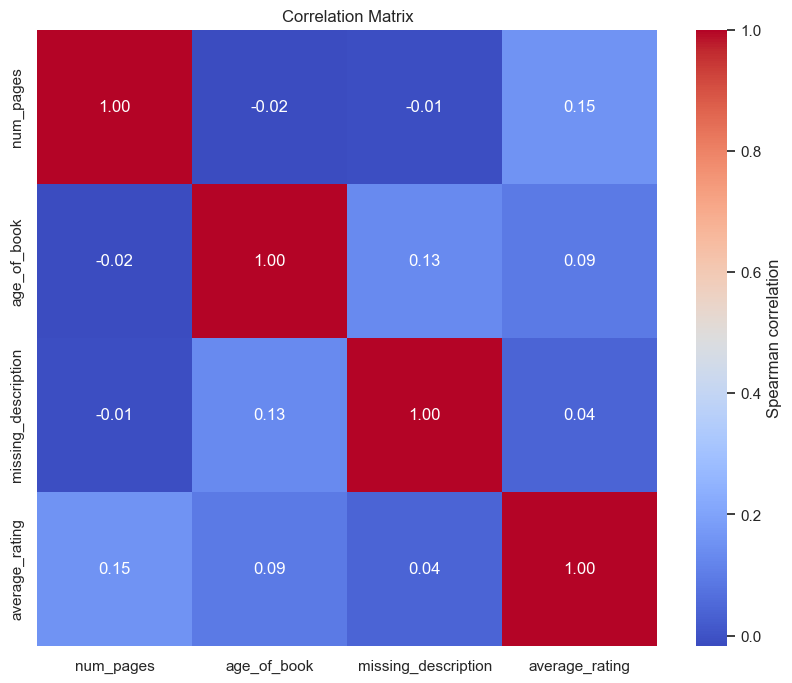

In [8]:
cols_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]
corr_matrix = books[cols_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
            cbar_kws={"label": "Spearman correlation"})
plt.title("Correlation Matrix")
plt.show()

In [9]:
final_books = books[~books["description"].isna() &
      (~books["num_pages"].isna()) &
      (~books["published_year"].isna()) &
      (~books["average_rating"].isna())].copy()
final_books.shape

(6507, 14)

In [10]:
final_books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0


In [11]:
#check missing, count, distinct in each column
missing_count = final_books.isnull().sum()
distinct_count = final_books.nunique()
count = final_books.count()
summary_df = pd.DataFrame({'missing_count': missing_count,
                            'count': count,
                           'distinct': distinct_count})
summary_df.T


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
missing_count,0,0,0,4226,63,33,214,0,0,0,0,0,0,0
count,6507,6507,6507,2281,6444,6474,6293,6507,6507,6507,6507,6507,6507,6507
distinct,6507,6507,6133,1915,3629,531,6293,6434,89,198,890,3826,1,89


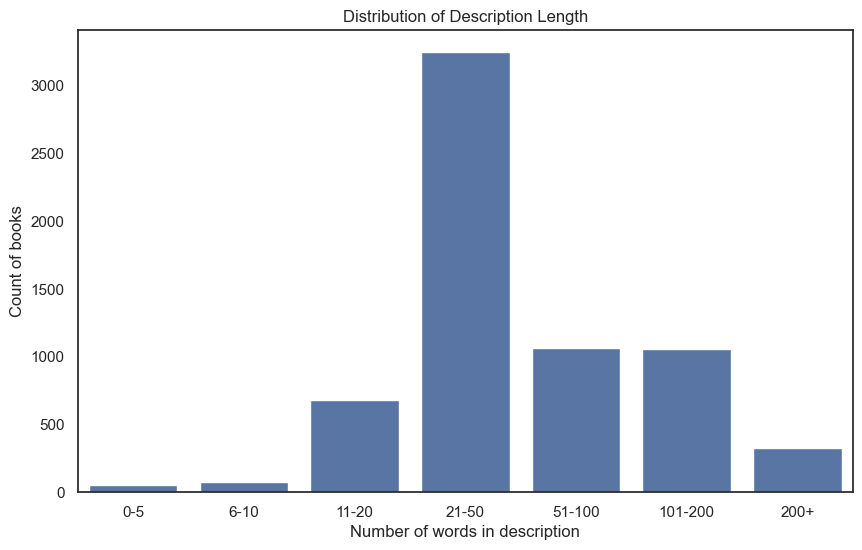

In [12]:
final_books["words_in_description"] = final_books["description"].apply(lambda x: len(x.split()))
bins = [0, 5, 10, 20, 50, 100, 200, final_books["words_in_description"].max()]
labels = ['0-5', '6-10', '11-20', '21-50', '51-100', '101-200', '200+']
final_books["description_length_bin"] = pd.cut(final_books["words_in_description"], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.countplot(data=final_books, x="description_length_bin", order=labels)
plt.xlabel("Number of words in description")
plt.ylabel("Count of books")
plt.title("Distribution of Description Length")
plt.show()

In [13]:
final_books.loc[final_books["words_in_description"].between(1, 5), "description"]

6                                             Donation.
11                                       Fantasy-roman.
77                       Nonsense rhyming story. 4 yrs+
104                      Library of Liberal Arts title.
682                    Biography of John Wesley Powell.
                             ...                       
6695                                 No Marketing Blurb
6704    Accessible and affordable illustrated biography
6721                                            Horror.
6757                        Audio Book- unabriged on CD
6794                               源氏物語54帖、「宮田切り絵」の真骨頂。
Name: description, Length: 66, dtype: object

In [14]:
final_books.loc[final_books["words_in_description"].between(6, 15), "description"]

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
83      Tie your tongue in terrible knots as you try t...
84      A study guide for the novel There's a Boy in t...
                              ...                        
6726       Presents two complete novels from Henry James.
6730    Nineteen writers dig into the spaces between g...
6767    Everything from the fingerprints of the gods t...
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 384, dtype: object

In [15]:
final_books.loc[final_books["words_in_description"].between(15, 24), "description"]

10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

In [16]:
final_books.loc[final_books["words_in_description"].between(25, 34), "description"]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [17]:
final_books_25_words = final_books[final_books["words_in_description"] >= 25].copy()
final_books_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,description_length_bin
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,101-200
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,200+
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,51-100
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,21-50
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,51-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,200+
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,51-100
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,101-200
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,101-200


### f. Create new column `title_and_subtitle`, `tagged_description`

In [18]:
final_books_25_words["title_and_subtitle"] = (
    np.where(final_books_25_words["subtitle"].isnull(), final_books_25_words["title"],
    final_books_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)

In [19]:
final_books_25_words["tagged_description"] = final_books_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

In [20]:
final_books_25_words.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,description_length_bin,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,101-200,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,200+,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,51-100,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,21-50,The Four Loves,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,51-100,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."


### g. Save to final CSV file

In [21]:
(
    final_books_25_words
    .drop(columns=["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1)
    .to_csv("book_cleaned.csv", index=False)
)

In [22]:
books = pd.read_csv("book_cleaned.csv")
books.head()

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,description_length_bin,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,101-200,Gilead,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,200+,Spider's Web: A Novel,9780002261982 A new 'Christie for Christmas' -...
2,9780006178736,0006178731,Rage of angels,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,51-100,Rage of angels,"9780006178736 A memorable, mesmerizing heroine..."
3,9780006280897,0006280897,The Four Loves,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,21-50,The Four Loves,9780006280897 Lewis' work on the nature of lov...
4,9780006280934,0006280935,The Problem of Pain,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,51-100,The Problem of Pain,"9780006280934 ""In The Problem of Pain, C.S. Le..."
